# Hmwk #5 - Regression Analysis

## Problem #1 - Trees

Foresters want to measure the volume of a tree in order to estimate how much lumber they would get for that tree. Knowing the girth and height of the tree, one could apply a cylinder approximation, but the tree does not have a uniform girth along its entire length -- the tree gets much smaller at the top. The UsingR library has a data set "trees", that contains a set of measurements of the girth and height of a tree. Use the library to assess a linear model. For example, you might try:

In [108]:
library(UsingR)

summary(trees)

     Girth           Height       Volume     
 Min.   : 8.30   Min.   :63   Min.   :10.20  
 1st Qu.:11.05   1st Qu.:72   1st Qu.:19.40  
 Median :12.90   Median :76   Median :24.20  
 Mean   :13.25   Mean   :76   Mean   :30.17  
 3rd Qu.:15.25   3rd Qu.:80   3rd Qu.:37.30  
 Max.   :20.60   Max.   :87   Max.   :77.00  

** If we look at the regression model **

In [109]:
m = lm(Volume ~ Height + Girth, data=trees)
summary(m)


Call:
lm(formula = Volume ~ Height + Girth, data = trees)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4065 -2.6493 -0.2876  2.2003  8.4847 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -57.9877     8.6382  -6.713 2.75e-07 ***
Height        0.3393     0.1302   2.607   0.0145 *  
Girth         4.7082     0.2643  17.816  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.882 on 28 degrees of freedom
Multiple R-squared:  0.948,	Adjusted R-squared:  0.9442 
F-statistic:   255 on 2 and 28 DF,  p-value: < 2.2e-16


This provides a model, but doesn't say if it's any good. Do the following using R -- i.e. use the output of the 'lm' linear model where possible. Show your work.

### What is the R^2 for this model

In [110]:
#Coefficient of determination
volume = trees$Volume
sse = sum((predict(m)- volume)^2)
sst = sum((volume-mean(volume))^2)
Ssr = sst - sse
Ssr/sst
#this will output our r^2

[1] 0.94795

### Compute the 95% confidence interval for the Height parameter 
(**nb:** you're being asked to calculate the CI of the parameter from the multi-linear model, not the CI of the Height data itself). To do this, you would use the standard error (shown in the summary of the linear model -- e.g. 0.1302 for parameter Height) for each parameter -- this is the standard error for that parameter derived from the MSE as described in the slides concerning multi-linear regression. You would then conduct the T-distribution using that standard error with n-k-1 degrees of freedom. See the slides on linear regression.

In [111]:
se = .1302
height = 0.3393 
critVal = qt(1-.05/2, df=28)
c(height - critVal*se, height + critVal*se)
confint(m,"Height")

[1] 0.07259739 0.60600261

,2.5 %,97.5 %
Height,0.07264863,0.60585384


### Compute the 95% confidence interval for the Girth parameter 
(**nb:** as above). Verify your value using the **confint** function in R.

In [112]:
se = 0.2643 
height = 4.7082 
critVal = qt(1-.05/2, df=28)
c(height - critVal*se, height + critVal*se)
confint(m,"Girth")
#both of these intervals are close to the point that I believe the slight
#variation is due to the std error values being rounded in the summary
#that I took them from.

[1] 4.166806 5.249594

,2.5 %,97.5 %
Girth,4.166839,5.249482


### Does the Height parameter statistically equal zero? Does the Girth?

In [113]:
#We have our T-values for height and girth in the above summary. we can use those to generate p-values
#p-values tell us if our parameters are statistically equal to 0. low p-values indicate that they are not
# More accurately, low p values tell us we can throw out our null hypothesis. default null is always
#that the parameter is statistically equal to 0
#p = 1 - cdf 
1- pt(2.607,28)
1- pt(17.816,28)
#these P values are low enough to rule out the parameters statistically being equal to 0

[1] 0.007238605

[1] 0

### Complete this sentence:
"For every unit increase in Girth, the Volume increases by ______ and for every unit increase in Height, the Volume increases by ______"

In [114]:
#"For every unit increase in Girth, the Volume increases by 4.7082 unit 
#and for every unit increase in Height, the Volume increases by 0.3393 unit"

## Problem #2 - Body Fat

In [115]:
data(fat)

The Body Mass Index (BMI) is a model to predict the percentage of body fat based on your weight and height. The VMI is defined as the ratio of weight (in kilograms) to the square of height (in metres). A BMI of 18.5 to 25 is considered "healthy", a BMI of 25 to 30 is "overweight" and a BMI over 30 is "obese". The dataset 'fat' from UsingR contains 19 factors. The true body fat is body.fat and BMI field is the BMI.



### Using the 'fat' data set, build a linear model
of the body.fat predicted by BMI.
Describe the linear model -- what are the intercept and slope.
What is the $r^2$ of that model?


In [117]:
fatLM = lm(body.fat ~ BMI, data = fat)
summary(fatLM)
#the intercept is about -20, and the slope is about 1.54. The r-squared is .53. This is not a very high r-squared
#which indicates that BMI is probably not the best predictor of body fat , perhaps not surprisingly,
#as it is BMI is a farly simplistic formula, which at one point told 
#Dwayne "The Rock" Johnson that he was obese


Call:
lm(formula = body.fat ~ BMI, data = fat)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.4292  -3.4478   0.2113   3.8663  11.7826 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -20.40508    2.36723   -8.62 7.78e-16 ***
BMI           1.54671    0.09212   16.79  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.324 on 250 degrees of freedom
Multiple R-squared:   0.53,	Adjusted R-squared:  0.5281 
F-statistic: 281.9 on 1 and 250 DF,  p-value: < 2.2e-16


### Come up with a minimal model that predicts body.fat using the other factors with an R2 of at least 0.72
We will use these different factors to come up with a minimal model that predicts body.fat using the other factors with an R2 of at least 0.72. Each factor in the final model should be significant at the 95% level -- this means that the confidence interval of the parameter at the 95% confidence level should not include zero. 

Include your description showing both your final result and the process by which you achieve that result. Your model shouldn't use the "density" or "body.fat.siri" factors, as those are the "gold standard" measurements used to calculate body fat (using a dunk tank). I'm not certain what "ffweight" is, but don't use that either.

You may want to understand the "p-value" for problem - basically, the p-value is the probability of observing a value at least as large as the "t-value" (which is the estimate / std. error). Effectively, this is providing a way to determine if that value is statistically equal to zero.

You should describe the process you use, not just the end result. You should also insure that the linear model is valid, meaning that the predictors are not correlated, etc. Wikipedia has a good article on such "stepwise refinement" mechanisms [ http://en.wikipedia.org/wiki/Stepwise_regression ]. See also the discussion on page 125 of the book by Faraway on Practical Regression Analysis using R (on the couse web page or http://cran.r-project.org/doc/contrib/Faraway-PRA.pdf). They describe a "backward" and "forward" mechanism where you either start with all terms & toss some away or start adding terms to a null model.

In [118]:
#I actually have some experience with fitness, and have calculated my own body fat multiple times.
#Because of this, I have some preconceived notions about which of these measurements will be useful.
#My go to when I measured myself was height, abdomen, and hip. SO I will start there
betterFat = lm(body.fat ~ height + abdomen + hip, data = fat)
summary(betterFat)
#so betterFat was in fact, better. Not quite there yet though. I am going to also throw wrist in.
#I have seen wrist used, but always thought it was kind of a dumb indicator. 
#That said, the person I lifted with who was a fan of the wrist measurement is now a personal trainer.
#So that is what I am going to tack on next
bestFat = lm(body.fat ~ height + abdomen + hip + wrist, data = fat)
summary(bestFat)


Call:
lm(formula = body.fat ~ height + abdomen + hip, data = fat)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.2921  -3.0503  -0.1652   2.8428  10.4638 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.82094    6.00588  -0.137  0.89139    
height      -0.28053    0.07405  -3.788  0.00019 ***
abdomen      0.78791    0.05102  15.442  < 2e-16 ***
hip         -0.33519    0.07764  -4.318 2.28e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.2 on 248 degrees of freedom
Multiple R-squared:  0.7099,	Adjusted R-squared:  0.7064 
F-statistic: 202.3 on 3 and 248 DF,  p-value: < 2.2e-16



Call:
lm(formula = body.fat ~ height + abdomen + hip + wrist, data = fat)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.8854  -2.6881  -0.3888   3.1326   9.4414 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.16512    6.48719   1.567 0.118406    
height      -0.18851    0.07580  -2.487 0.013548 *  
abdomen      0.83358    0.05099  16.347  < 2e-16 ***
hip         -0.28157    0.07676  -3.668 0.000299 ***
wrist       -1.48249    0.38075  -3.894 0.000127 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.085 on 247 degrees of freedom
Multiple R-squared:  0.7267,	Adjusted R-squared:  0.7223 
F-statistic: 164.2 on 4 and 247 DF,  p-value: < 2.2e-16


In [119]:
confint(bestFat,"height")
confint(bestFat,"wrist")
confint(bestFat,"abdomen")
confint(bestFat,"hip")
# we see that all have significnace at 95% level.
#lets check correlation
cor(fat$height,fat$wrist)
cor(fat$height,fat$abdomen)
cor(fat$height,fat$hip)
cor(fat$wrist, fat$abdomen)
cor(fat$wrist, fat$hip)
cor(fat$abdomen, fat$hip)
#these correlations show a variety of weak to strong correlation.
#none are perfect correlations however, and the strongest is hip to abdomen
#not even hip to abdomen is a perfect correlation
#further, some of the best predictors are absolutely going to show some levels of correlation
#if you have less body fat, your hips are likely to be smaller, as is your abdomen.
#same with vice versa.
#in the summary we see a p-value of less that 2.2810^-16, this strongly indicates that our parameters are 
#not statistically equal to 0

,2.5 %,97.5 %
height,-0.3378178,-0.0392107


,2.5 %,97.5 %
wrist,-2.2324293,-0.7325588


,2.5 %,97.5 %
abdomen,0.7331440,0.9340151


,2.5 %,97.5 %
hip,-0.4327447,-0.1303878


[1] 0.3220653

[1] 0.08781291

[1] 0.1703943

[1] 0.6198324

[1] 0.6300895

[1] 0.8740662

## Problem #3 - Wireless networks

This data contains measurements from 3 wireless network devices. One is an 802.11 "Wifi" interface running at 1Mbs/s. The second is that same interface running at 11Mb/s. Lastly, the same interface running at 54Mb/s. The data is stored as R vectors named x1, y1, x11, y11 and x54, y54. The X value is the packet size for the time measurement recorded at the corresponding Y value. The units are milliseconds. For example, x11[1] is 350 bytes and y11[1] is 1.436782 millseconds. It took 1.436782 milliseconds to transmit a 350 byte packet.

In [120]:
x11 = c(350, 350, 350, 350, 350, 450, 450, 450, 450, 450, 550, 550, 550,
550, 550, 650, 650, 650, 650, 650, 750, 750, 750, 750, 750, 850, 850,
850, 850, 850, 950, 950, 950, 950, 950, 1050, 1050, 1050, 1050, 1050,
1150, 1150, 1150, 1150, 1150, 1250, 1250, 1250, 1250, 1250, 1350,
1350, 1350, 1350, 1350, 1450, 1450, 1450, 1450, 1450 )

y11 = c(
1.436782, 1.407063, 1.436782, 1.426737, 1.416832, 1.50015, 1.533978,
1.50015, 1.522533, 1.511259, 1.619433, 1.619433, 1.576541, 1.576541,
1.587050, 1.682935, 1.662787, 1.693193, 1.682935, 1.693193, 1.745505,
1.755310, 1.765225, 1.755310, 1.755002, 1.833853, 1.805054, 1.824152,
1.853568, 1.853568, 1.915342, 1.915342, 1.915342, 1.904762, 1.915342,
1.992429, 1.982161, 1.992429, 1.961169, 1.971998, 2.072539, 2.052124,
2.062281, 2.062281, 2.082466, 2.15378, 2.143623, 2.133561, 2.113718,
2.103934, 2.182453, 2.182453, 2.182453, 2.154244, 2.182453, 2.241147,
2.26142, 2.241147, 2.301496, 2.282063)

x1 = c( 350, 350, 350, 350, 350, 450, 450, 450, 450, 450, 550, 550,
550, 550, 550, 650, 650, 650, 650, 650, 750, 750, 750, 750, 750, 850,
850, 850, 850, 850, 950, 950, 950, 950, 950, 1050, 1050, 1050, 1050,
1050, 1150, 1150, 1150, 1150, 1150, 1250, 1250, 1250, 1250, 1250,
1350, 1350, 1350, 1350, 1350, 1450, 1450, 1450, 1450, 1450)

y1 = c( 4.161465, 4.078303, 4.078303, 4.078303, 4.078303, 4.741584,
4.741584, 4.741584, 4.741584, 4.741584, 5.534034, 5.534034, 5.534034,
5.534034, 5.534034, 6.30517, 6.30517, 6.30517, 6.30517, 6.30517,
7.097232, 7.097232, 7.097232, 6.939625, 7.097232, 7.830854, 7.830854,
7.830854, 7.830854, 7.830854, 8.403361, 8.403361, 8.403361, 8.403361,
8.403361, 9.14913, 9.14913, 9.14913, 9.14913, 9.14913, 9.910803,
9.910803, 9.910803, 9.910803, 9.910803, 10.81081, 10.81081, 10.55966,
10.81081, 10.81081, 11.60093, 11.60093, 11.33787, 11.33787, 11.33787,
12.16545, 12.16545, 12.16545, 12.16545, 12.16545)

x54 = c( 350, 350, 350, 350, 450, 450, 450, 450, 550, 550, 550, 550,
650, 650, 650, 650, 750, 750, 750, 750, 850, 850, 850, 850, 950, 950,
950, 950, 1050, 1050, 1050, 1050, 1150, 1150, 1150, 1150, 1250, 1250,
1250, 1250, 1350, 1350, 1350, 1350, 1450, 1450, 1450, 1450)

y54 = c( 0.2812386, 0.2804341, 0.2798769, 0.2815553, 0.2995088,
0.2986679, 0.3006705, 0.298454, 0.311886, 0.3199386, 0.3163556,
0.3186439, 0.3333333, 0.3369953, 0.3340236, 0.3311258, 0.3412969,
0.3373933, 0.341006, 0.3411456, 0.3531198, 0.3563284, 0.3578714,
0.3521871, 0.3733154, 0.3752768, 0.3761803, 0.3780432, 0.3957888,
0.3914660, 0.3928656, 0.3961651, 0.4116921, 0.4088307, 0.4083966,
0.4038935, 0.4210704, 0.4251339, 0.4259488, 0.4252243, 0.4428698,
0.4405869, 0.4386157, 0.4402959, 0.4577287, 0.4561211, 0.4573938,
0.4607658)

### Answer the following questions:

To answer these questions, you should use the lecture slides on linear regression and section 13 from the SimpleR.pdf book from the course website (page 77). You can also refer to the material by Boudec, but his write-up is, as per normal, complex.

* Using R as a calculator, but not using the built-in regression functions, calculate using the equations in the Linear Regression slides:
* The slope (b) and intercept (a) of the regression model for the 1Mb/s network (using x1, y1)
* The coefficient of determination for the model for the 1Mb/s network (using x1,y1)
* The standard deviation for slope & intercept and the 95% confidence interval for the 1Mb/s network (using x1,y1)
* The predicted time, standard deviation and 95% confidence interval for the predicted time to transmit a 40 byte Wifi packet for the 1Mb/s network (using x1,y1)
* The predicted time, standard deviation and 95% confidence interval to transmit a 750 byte packet for the 1Mb/s network (using x1,y1)

In [121]:
#linear regression of time predicted by packet size on 1mb/s
xbar = mean(x1)
ybar = mean(y1)
Sxx = sum((xbar-x1)^2)
Syy = sum((ybar-y1)^2)
Sxy = sum((y1-ybar)*(x1-xbar))
b = Sxy/Sxx
b
a = ybar - b*xbar
a
# b = .0073610
# a = 1.492114
Sst = sum((y1-ybar)^2)
l = lm(y1~x1)
Sse = sum(((predict(l)-y1)^2))
Ssr = Sst - Sse
r2 = Ssr/Sst
r2
#r-squared (coefficient of determination) = .99915
stdRegErr = sqrt(Sse/58)
stdDevSlope = (stdRegErr/sqrt(Sxx))
stdDevSlope
stdDevInt = stdRegErr*sqrt((sum(x1^2))/(60*Sxx))
stdDevInt
Tcrits = qt(c(.025, .975), df=58) 
aInt = a + Tcrits*stdDevInt
slopeInt = b + Tcrits*stdDevSlope
#Our 95% confidence linear regression is y = aInt + slopeInt*x !
#We will use this to estimate 40 byte packet
timePredict = a + b*40
timePredict
confIntervalTime = aInt + slopeInt*40
confIntervalTime 
sdPredict = timePredict - confIntervalTime
sdPredict
#So our prediction is about 1.78 with 95% confidence that 
#this value would fall in the interval (1.73,1.84)
#SdPredict shows us the standard deviation of this prediction is plus/minus .05648435

#Now, lets predict 750
timePredict2 = a + b*750
timePredict2
confIntervalTime2 = aInt + slopeInt*750
confIntervalTime2 
sdPredict2 = timePredict - confIntervalTime
sdPredict2
#So our prediction is about 7.0129 with 95% confidence that 
#this value would fall in the interval (6.9164,7.10933)
#SdPredict shows us the standard deviation of this prediction is plus/minus .05648435

[1] 0.007361049

[1] 1.492115

[1] 0.9991551

[1] 2.81074e-05

[1] 0.02709365

[1] 1.786557

[1] 1.730072 1.843041

[1]  0.05648435 -0.05648435

[1] 7.012901

[1] 6.916470 7.109333

[1]  0.05648435 -0.05648435

### Settle a law suit

Using the 'lm' functions in R or the simple.lm functions from the UsingR package (documented in the Simple R guide, section 13 page 77), answer the following questions
* Prepare a plot of the data, the regression model and the 95% confidence interval for each of the data sets. Label the plot with the parameters of the regression model. If you plot all the data on a single plot, you can put the parameters in the legend rather than the title.
* Larry the Lawyer wants to sue because the 11Mb/s network is not 11 times "faster" than the 1Mb/s network. Compare the slope (time per byte) and intercept (overhead per packet). Is the 11Mb/s network 11 times faster at a 95% confidence level? Is the overhead different?
* Using your models, predict the time to transmit a 40 byte packet using each network (using a 95% confidence interval). What's Larry doing now (i.e. crying or filiing a suit?)
* Repeat that for a 750 and 1500 byte packet. Does Larry still have a case? What if you compare the time to transmit a 40 byte packet to a 1500 byte packet, which is 37 times bigger?
* For the 54Mb/s data, argue that the regression model is or is not appropriate for the data. Use the full range of techniques described in Jain and in class. Are there specific measurement samples which seem to be more problematic than others? Which ones?

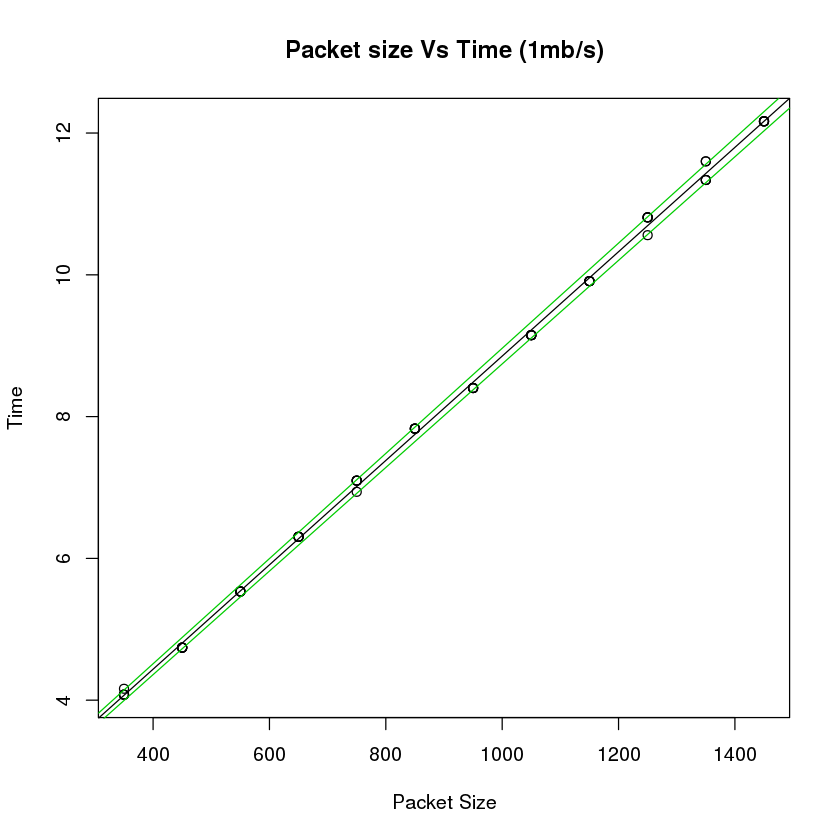

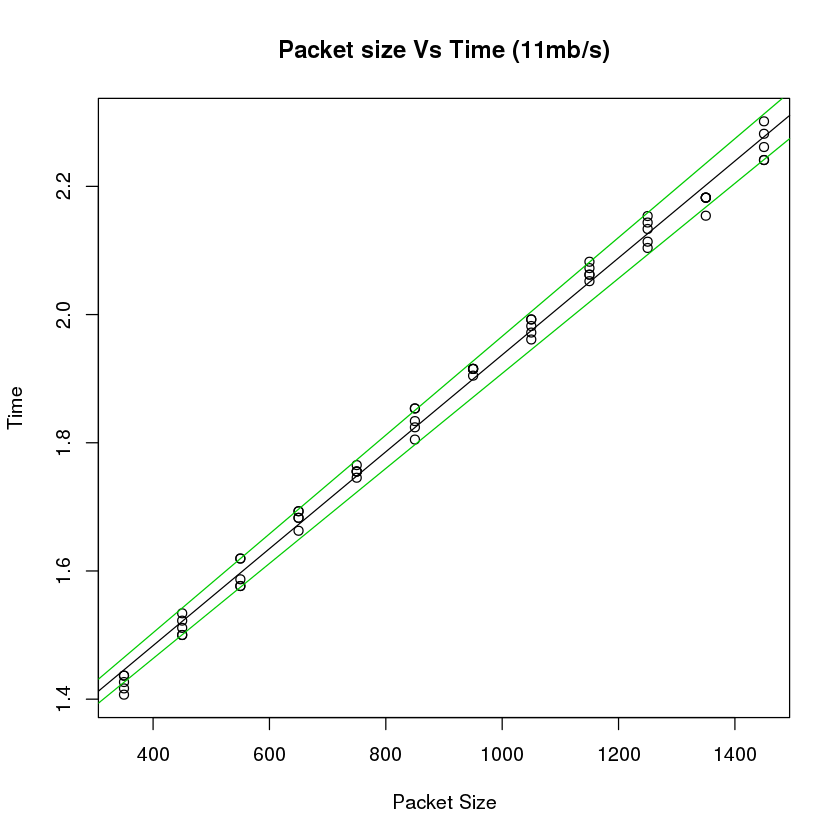

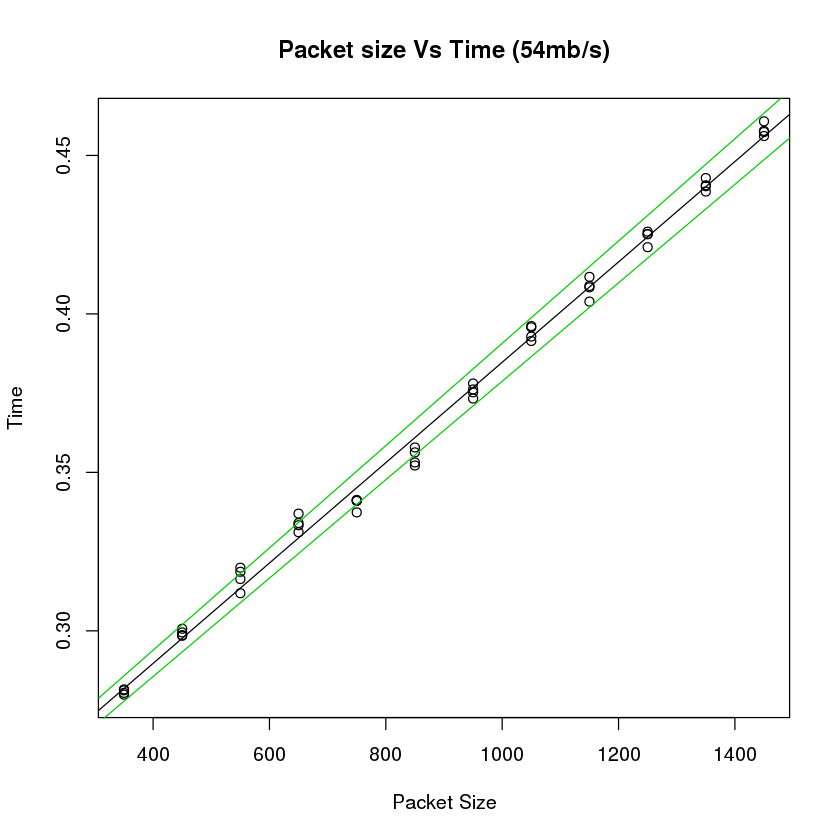

In [122]:
plot(x1,y1, main = "Packet size Vs Time (1mb/s)", xlab = "Packet Size", ylab = "Time")
abline(lm(y1~x1))
conf1 = confint(lm(y1~x1))
abline(conf1[1],conf1[2],col = 3)
abline(conf1[3],conf1[4],col = 3)

plot(x11,y11, main = "Packet size Vs Time (11mb/s)", xlab = "Packet Size", ylab = "Time")
abline(lm(y11~x11))
conf11 = confint(lm(y11~x11))
abline(conf11[1],conf11[2],col = 3)
abline(conf11[3],conf11[4],col = 3)
 
plot(x54,y54, main = "Packet size Vs Time (54mb/s)", xlab = "Packet Size", ylab = "Time")
abline(lm(y54~x54))
conf54 = confint(lm(y54~x54))
abline(conf54[1],conf54[2],col = 3)
abline(conf54[3],conf54[4],col = 3)

In [123]:
lm1 = lm(y1~x1)
lm11 = lm(y11~x11)
lm1 
lm11
confint(lm1)
confint(lm11)
#We see that the time/byte for the 11mb/s is roughly an order of 10 lower than the 1mb/s.
#However the overhead/packet is roughly the same, with the 11mb/s a tad smaller
#At our 95% confidence interval, we see that the 11mb is roughly 10 times faster, not quite 11, but close


Call:
lm(formula = y1 ~ x1)

Coefficients:
(Intercept)           x1  
   1.492115     0.007361  



Call:
lm(formula = y11 ~ x11)

Coefficients:
(Intercept)          x11  
  1.1810648    0.0007561  


,2.5 %,97.5 %
(Intercept),1.437881,1.546349
x1,0.007304786,0.007417312


,2.5 %,97.5 %
(Intercept),1.166855,1.195275
x11,0.0007413121,0.0007707959


In [124]:
lm54 = lm(y54~x54)
predict1 = predict(lm1, data.frame(x1 = c(40)))
predict11 = predict(lm11, data.frame(x11 = c(40)))
predict54 = predict(lm54, data.frame(x54 = c(40)))
predict1
predict11
predict54
predict1/predict11
#Larry isn't necessarily wrong here. these predictions show that 11mb/s is not 11 times faster than 1mb/s.
#for every 1 byte on 1mb/s, about 1.4 on 11mb/s

1 
1.786557

1 
1.211307

1 
0.2327204

1 
1.4749

In [78]:
predict1mid = predict(lm1, data.frame(x1 = c(750)))
predict11mid = predict(lm11, data.frame(x11 = c(750)))
predict54mid = predict(lm54, data.frame(x54 = c(750)))
predict1mid
predict11mid
predict54mid

predict1large = predict(lm1, data.frame(x1 = c(1500)))
predict11large = predict(lm11, data.frame(x11 = c(1500)))
predict54large = predict(lm54, data.frame(x54 = c(1500)))
predict1large
predict11large
predict54large

#we see that as our packet size grows Larry's case begins to fall apart. 
#When comparing the time on the 40byte and the 1500byte, we see that 1mb/s has gotten a full 11 seconds slower,
#while on the 11mb/s it has only gotten 1 second slower. That indicates that Larry's case
#is obviously not a good one

1 
7.012901

1 
1.748105

1 
0.3451396

1 
12.53369

1 
2.315146

1 
0.4638923

In [125]:
lm54
summary(lm54)


Call:
lm(formula = y54 ~ x54)

Coefficients:
(Intercept)          x54  
  0.2263869    0.0001583  



Call:
lm(formula = y54 ~ x54)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0087862 -0.0016716  0.0002906  0.0020847  0.0076894 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.264e-01  1.459e-03   155.1   <2e-16 ***
x54         1.583e-04  1.514e-06   104.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003621 on 46 degrees of freedom
Multiple R-squared:  0.9958,	Adjusted R-squared:  0.9957 
F-statistic: 1.094e+04 on 1 and 46 DF,  p-value: < 2.2e-16


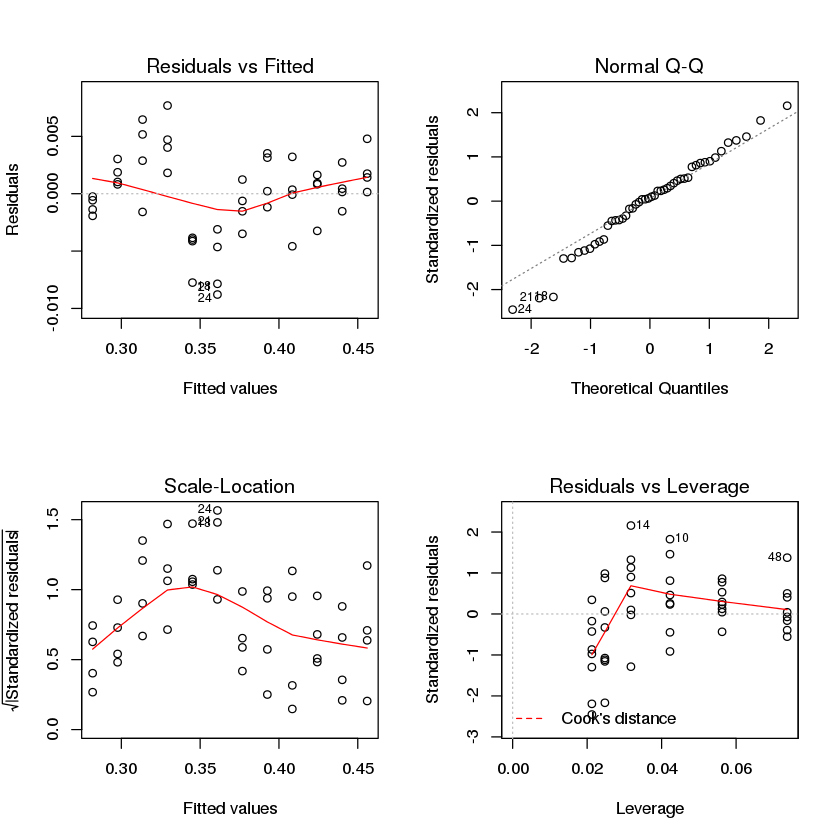

In [126]:
#So here we see several key things. 
#Our data is scattered very closely to our linear regression line, indicating a good fit
#now lets generate someother important graphs.
par(mfrow=c(2,2))
plot(lm54)

In [127]:
#We see a fairly random Fitted Values v Residuals graph, which is what we want in a good fit
#If there was a pattern to that graph, it would indicate that the data would be better fitted by a different model
#Further, our r-squared value is .9958. 
#Using these 3 facts, I believe that this model fits our data well for 54mb/s